<a href="https://colab.research.google.com/github/NorahEkuttan/Regression_IP_Week7/blob/main/WEEK_7_core_Norah_Ekuttan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#           ***  NORAH NAROH WEEK 7 INDEPENDENT PROJECT ***


## 1. Defining the Question

### a) Specifying the Question


As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.


### b) Defining the Metric for Success

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

### c) Understanding the context 

### d) Recording the Experimental Design
In this study, I'll be conducting Explorative Data Analysis, i.e Univariate, Bivariate analysis to get a scope of what my data entails


For regression analysis, I'll implement the following regression techniques and compare their performances.

Multiple Linear Regression

Quantile Regression

Ridge Regression


Lasso Regression

Elastic Net Regression

### e) Data Relevance

## 2. Reading the Data

In [ ]:

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
# Loading the Dataset 
#Factors-affecting-housing-prices-analysis-IP-Week-7
hp_df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
hp_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
hp_df.shape

(21613, 20)

In [ ]:
# Previewing the top of our dataset
#
hp_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the bottom of our dataset
# 
hp_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype
#
hp_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
hp_df.isnull().sum()
#we do not have any null values in our data

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
hp_df.duplicated().sum()
#we have 3 duplicated values so we dropped them

3

In [ ]:
hp_df =hp_df.drop_duplicates()

In [ ]:
hp_df.duplicated().sum()

0

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation
It is Important for us to specify the feature variable and the target variable.

Target varibale is the price

feature variable is the bedrooms ,bathrooms,sqft_living, sqft_lot,
       floors, waterfront, view, condition, grade, sqft_above,
       sqft_basement, yr_built, yr_renovated, zipcode, lat, long,
       sqft_living15, sqft_lot15],
      dtype='object')

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
#
hp_df.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

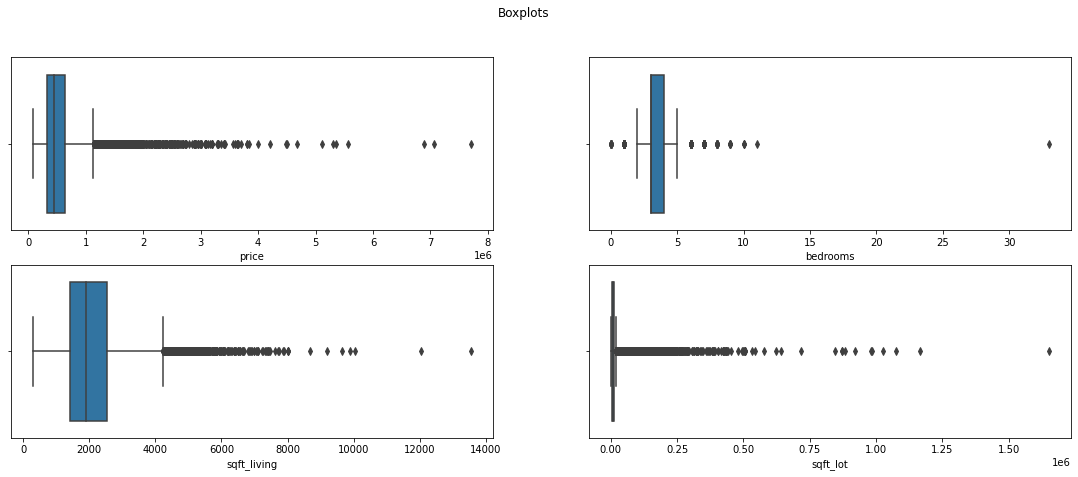

In [ ]:
#checking the outliers for the fifa data
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(hp_d, ax=ax1)
sb.boxplot(hp_df['bedroomsf['price']'], ax=ax2)
sb.boxplot(hp_df['sqft_living'], ax=ax3)
sb.boxplot(hp_df['sqft_lot'], ax=ax4)


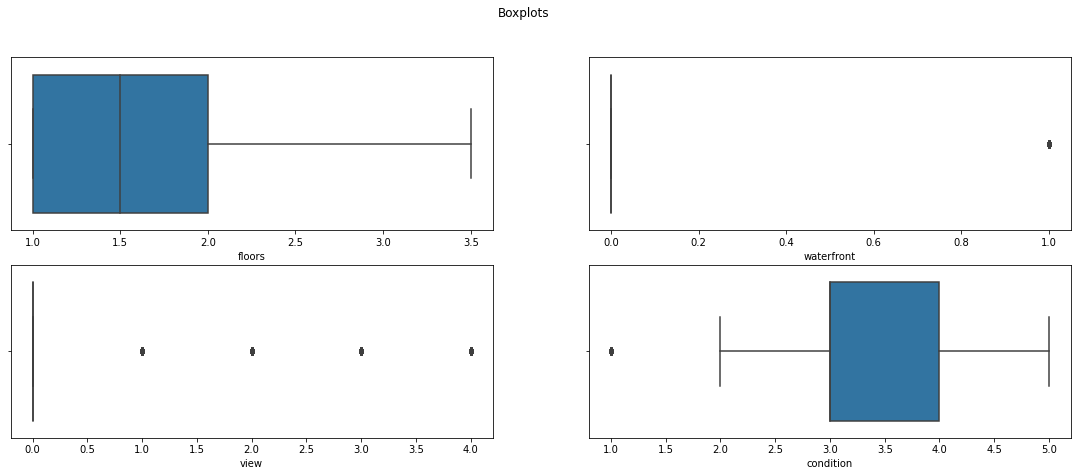

In [ ]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(hp_df['floors'], ax=ax1)
sb.boxplot(hp_df['waterfront'], ax=ax2)
sb.boxplot(hp_df['view'], ax=ax3)
sb.boxplot(hp_df['condition'], ax=ax4)

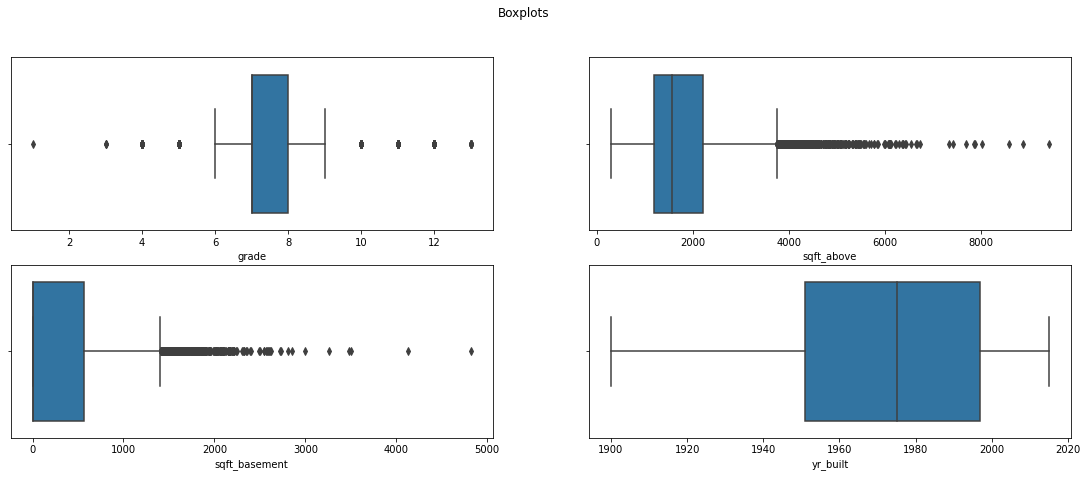

In [ ]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(hp_df['grade'], ax=ax1)
sb.boxplot(hp_df['sqft_above'], ax=ax2)
sb.boxplot(hp_df['sqft_basement'], ax=ax3)
sb.boxplot(hp_df['yr_built'], ax=ax4)

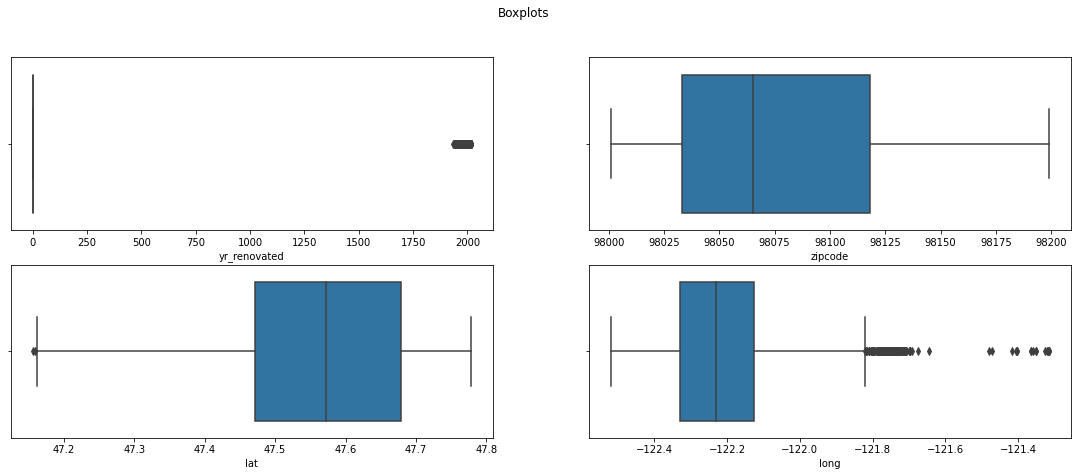

In [ ]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(hp_df['yr_renovated'], ax=ax1)
sb.boxplot(hp_df['zipcode'], ax=ax2)
sb.boxplot(hp_df['lat'], ax=ax3)
sb.boxplot(hp_df['long'], ax=ax4)

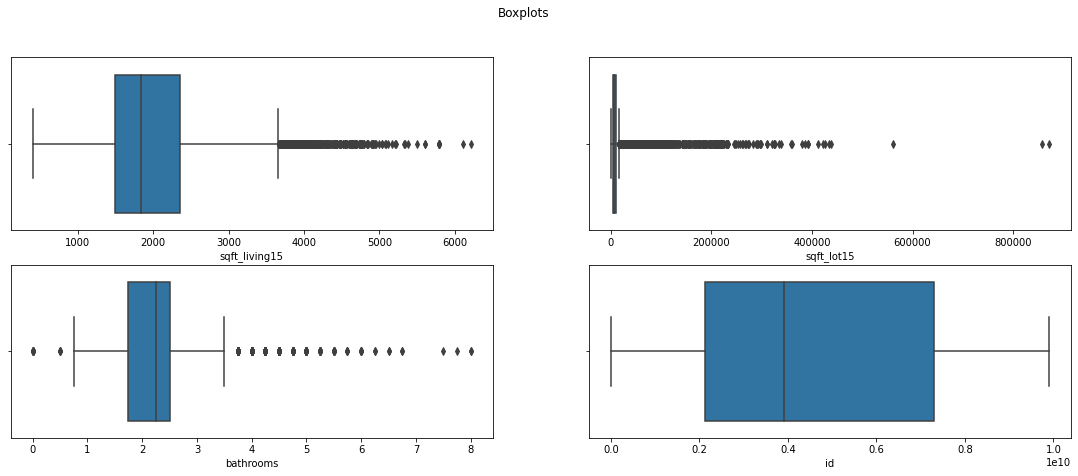

In [ ]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(hp_df['sqft_living15'], ax=ax1)
sb.boxplot(hp_df['sqft_lot15'], ax=ax2)
sb.boxplot(hp_df['bathrooms'], ax=ax3)
sb.boxplot(hp_df['id'], ax=ax4)

Conclusion

Our data is now clean and with no outliers

## 6. Exploratory Analysis

# UNIVARIATE ANALYSIS

### Categorical Variable 

Frequency Table 

In [ ]:
hp_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
hp_df.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [ ]:
hp_df.yr_renovated.value_counts()

0       20697
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
hp_df.view.value_counts()

0    19487
2      963
3      509
1      332
4      319
Name: view, dtype: int64

In [ ]:
hp_df.condition.value_counts()

3    14029
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64

Bar charts

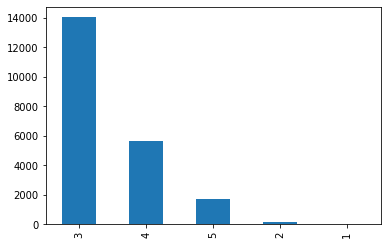

<Figure size 1008x648 with 0 Axes>

In [ ]:
hp_df['condition'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

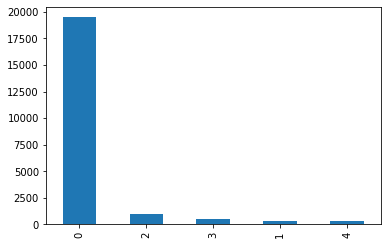

<Figure size 1008x648 with 0 Axes>

In [ ]:
# Ploting the univariate summaries and recording our observations
#
hp_df['view'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

### Numerical Variables

### Measure of Central Tendency(mean mode and median)

In [ ]:
hp_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#getting the measure of central tendency and Standard deviation together with variance of price
mean = hp_df["price"].mean()
median = hp_df["price"].median()
mode = hp_df["price"].mode()
std = hp_df["price"].std()
var = hp_df["price"].var()
max = hp_df["price"].max()
min = hp_df["price"].min()
range = max - min
quantile = hp_df["price"].quantile([0.25,0.5,0.75])
print('The mean of price is',mean)
print('The median of priceis',median)
print('The mode of price is',mode)
print('The standard deviation of price is',std)
print('The variance of priceis',var)
print('The Range of price is',range)
print('The quantile of price is',quantile)

The mean of price is 540178.9448403517
The median of priceis 450000.0
The mode of price is 0    350000.0
1    450000.0
dtype: float64
The standard deviation of price is 367387.58505388984
The variance of priceis 134973637651.72916
The Range of price is 7625000.0
The quantile of price is 0.25    321612.5
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64


  The  mean value of price was 540178, this is the average value spent on construction

In [ ]:
#getting the measure of central tendency and Standard deviation together with variance of bedrooms
mean = hp_df["bedrooms"].mean()
median = hp_df["bedrooms"].median()
mode = hp_df["bedrooms"].mode()
std = hp_df["bedrooms"].std()
var = hp_df["bedrooms"].var()
max = hp_df["bedrooms"].max()
min = hp_df["bedrooms"].min()
range = max - min
quantile = hp_df["bedrooms"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 3.370846830171217
The median is 3.0
The mode is 0    3
dtype: int64
The standard deviation is 0.9301096999846462
The variance is 0.8651040540055286
The Range is 33
The quantile is 0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64


In [ ]:
#getting the measure of central tendency and Standard deviation together with variance of bathroom
mean = hp_df["bathrooms"].mean()
median = hp_df["bathrooms"].median()
mode = hp_df["bathrooms"].mode()
std = hp_df["bathrooms"].std()
var = hp_df["bathrooms"].var()
max = hp_df["bathrooms"].max()
min = hp_df["bathrooms"].min()
range = max - min
quantile = hp_df["bathrooms"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 2.114738546968996
The median is 2.25
The mode is 0    2.5
dtype: float64
The standard deviation is 0.770203702285374
The variance is 0.593213743014097
The Range is 8.0
The quantile is 0.25    1.75
0.50    2.25
0.75    2.50
Name: bathrooms, dtype: float64


In [ ]:

mean = hp_df["sqft_living"].mean()
median = hp_df["sqft_living"].median()
mode = hp_df["sqft_living"].mode()
std = hp_df["sqft_living"].std()
var = hp_df["sqft_living"].var()
max = hp_df["sqft_living"].max()
min = hp_df["sqft_living"].min()
range = max - min
quantile = hp_df["sqft_living"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 2079.881212401666
The median is 1910.0
The mode is 0    1300
dtype: int64
The standard deviation is 918.5002986169898
The variance is 843642.7985594993
The Range is 13250
The quantile is 0.25    1425.5
0.50    1910.0
0.75    2550.0
Name: sqft_living, dtype: float64


In [ ]:
mean = hp_df["sqft_lot"].mean()
median = hp_df["sqft_lot"].median()
mode = hp_df["sqft_lot"].mode()
std = hp_df["sqft_lot"].std()
var = hp_df["sqft_lot"].var()
max = hp_df["sqft_lot"].max()
min = hp_df["sqft_lot"].min()
range = max - min
quantile = hp_df["sqft_lot"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 15108.289819527996
The median is 7619.0
The mode is 0    5000
dtype: int64
The standard deviation is 41423.2267370033
The variance is 1715883713.305185
The Range is 1650839
The quantile is 0.25     5040.00
0.50     7619.00
0.75    10688.75
Name: sqft_lot, dtype: float64


In [ ]:
mean = hp_df["waterfront"].mean()
median = hp_df["waterfront"].median()
mode = hp_df["waterfront"].mode()
std = hp_df["waterfront"].std()
var = hp_df["waterfront"].var()
max = hp_df["waterfront"].max()
min = hp_df["waterfront"].min()
range = max - min
quantile = hp_df["waterfront"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 0.007542804257288292
The median is 0.0
The mode is 0    0
dtype: int64
The standard deviation is 0.08652315751754107
The variance is 0.007486256786805223
The Range is 1
The quantile is 0.25    0.0
0.50    0.0
0.75    0.0
Name: waterfront, dtype: float64


In [ ]:
ean = hp_df["floors"].mean()
median = hp_df["floors"].median()
mode = hp_df["floors"].mode()
std = hp_df["floors"].std()
var = hp_df["floors"].var()
max = hp_df["floors"].max()
min = hp_df["floors"].min()
range = max - min
quantile = hp_df["floors"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 0.007542804257288292
The median is 1.5
The mode is 0    1.0
dtype: float64
The standard deviation is 0.5399935009500416
The variance is 0.2915929810682826
The Range is 2.5
The quantile is 0.25    1.0
0.50    1.5
0.75    2.0
Name: floors, dtype: float64


In [ ]:
ean = hp_df["sqft_above"].mean()
median = hp_df["sqft_above"].median()
mode = hp_df["sqft_above"].mode()
std = hp_df["sqft_above"].std()
var = hp_df["sqft_above"].var()
max = hp_df["sqft_above"].max()
min = hp_df["sqft_above"].min()
range = max - min
quantile = hp_df["sqft_above"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 0.007542804257288292
The median is 1560.0
The mode is 0    1300
dtype: int64
The standard deviation is 828.1387234173122
The variance is 685813.7452232556
The Range is 9120
The quantile is 0.25    1190.0
0.50    1560.0
0.75    2210.0
Name: sqft_above, dtype: float64


In [ ]:
mean = hp_df["sqft_living15"].mean()
median = hp_df["sqft_living15"].median()
mode = hp_df["sqft_living15"].mode()
std = hp_df["sqft_living15"].std()
var = hp_df["sqft_living15"].var()
max = hp_df["sqft_living15"].max()
min = hp_df["sqft_living15"].min()
range = max - min
quantile = hp_df["sqft_living15"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 1986.5186950485886
The median is 1840.0
The mode is 0    1540
dtype: int64
The standard deviation is 685.4257806364748
The variance is 469808.5007611208
The Range is 5811
The quantile is 0.25    1490.0
0.50    1840.0
0.75    2360.0
Name: sqft_living15, dtype: float64


In [ ]:
mean = hp_df["sqft_basement"].mean()
median = hp_df["sqft_basement"].median()
mode = hp_df["sqft_basement"].mode()
std = hp_df["sqft_basement"].std()
var = hp_df["sqft_basement"].var()
max = hp_df["sqft_basement"].max()
min = hp_df["sqft_basement"].min()
range = max - min
quantile = hp_df["sqft_basement"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 291.53331790837575
The median is 0.0
The mode is 0    0
dtype: int64
The standard deviation is 442.5966986816738
The variance is 195891.83768391635
The Range is 4820
The quantile is 0.25      0.0
0.50      0.0
0.75    560.0
Name: sqft_basement, dtype: float64


In [ ]:
mean = hp_df["sqft_lot15"].mean()
median = hp_df["sqft_lot15"].median()
mode = hp_df["sqft_lot15"].mode()
std = hp_df["sqft_lot15"].std()
var = hp_df["sqft_lot15"].var()
max = hp_df["sqft_lot15"].max()
min = hp_df["sqft_lot15"].min()
range = max - min
quantile = hp_df["sqft_lot15"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 12769.031975937067
The median is 7620.0
The mode is 0    5000
dtype: int64
The standard deviation is 27305.972463593964
The variance is 745616132.1825517
The Range is 870549
The quantile is 0.25     5100.0
0.50     7620.0
0.75    10083.0
Name: sqft_lot15, dtype: float64


In [ ]:
mean = hp_df["grade"].mean()
median = hp_df["grade"].median()
mode = hp_df["grade"].mode()
std = hp_df["grade"].std()
var = hp_df["grade"].var()
max = hp_df["grade"].max()
min = hp_df["grade"].min()
range = max - min
quantile = hp_df["grade"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 7.656779268857011
The median is 7.0
The mode is 0    7
dtype: int64
The standard deviation is 1.1755002014627765
The variance is 1.3818007236390282
The Range is 12
The quantile is 0.25    7.0
0.50    7.0
0.75    8.0
Name: grade, dtype: float64


OBSERVATIONS
Mean price for construction of a house is 540178

Mean of the bathroom 2.11 which means that the houses have an average of 2 bathroom

Mean of the bedroom 3.31 ,which shows that most house s have 3 bedroom

Mean of the basement was  291 and the median and mose were 0 which show that most houses did not have a basement



# BIVARIATE ANALYSIS

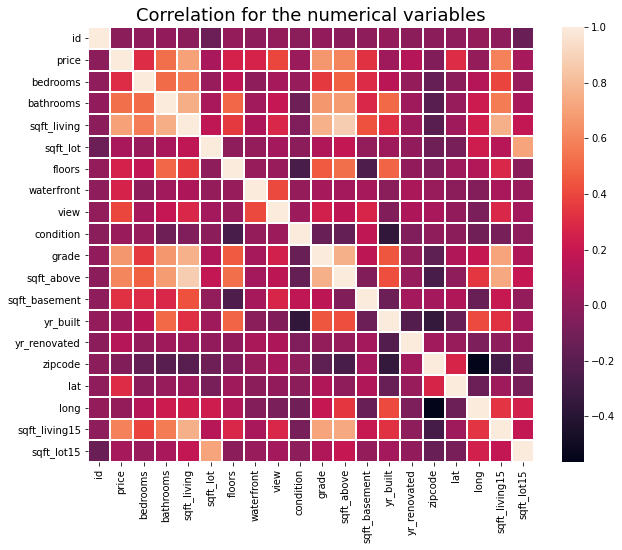

In [ ]:
#finding correlation between variables in our dataset
corr = hp_df.corr()
plt.figure(figsize=(10,8))
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

In [ ]:
hp_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


## MULTIPLE LINEAR REGRESSION

CHECKING FOR MULTICOLLINEARLITY

In [ ]:
independent_only = hp_df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
             'grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,0.279861,-0.011250
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.086469,0.030702
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,-0.092854,-0.003424
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,0.713208,0.119265
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,0.731870,0.194060


In [ ]:
#checking the vif 
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.644186,-0.461011,-5.846287e-01,0.044586,0.070643,0.061394,0.117541,-0.064963,0.326244,-3.578592e-01,-1.900137e-01,0.092827,0.039971,0.012496,0.082130
bathrooms,-0.461011,3.348329,-3.152916e+00,-0.019162,-0.681763,0.009537,-0.039280,-0.136581,-0.288261,1.582848e+00,4.341495e-01,-0.916321,-0.258046,0.095868,0.076591
sqft_living,-0.585043,-3.151582,1.814600e+13,-0.043879,2.609511,-0.073368,-0.064042,-0.109850,-2.051717,-1.636081e+13,-8.743992e+12,0.720161,0.188967,-0.920061,-0.011172
sqft_lot,0.044586,-0.019162,-4.303527e-02,2.088118,0.074213,0.028246,-0.051996,0.019147,-0.006197,-1.962482e-01,-7.614872e-04,0.026133,0.012442,0.127176,-1.474744
floors,0.070643,-0.681763,2.612696e+00,0.074213,1.931962,-0.003969,-0.062789,0.132884,-0.326805,-2.791937e+00,-6.957629e-01,-0.301452,-0.056955,0.358992,0.101144
waterfront,0.061394,0.009537,-7.404783e-02,0.028246,-0.003969,1.203300,-0.493571,-0.015267,0.047955,-4.273821e-02,3.223536e-02,-0.021977,-0.066202,0.057239,-0.016950
view,0.117541,-0.039280,-6.259227e-02,-0.051996,-0.062789,-0.493571,1.404335,-0.008112,-0.184309,1.027080e-01,-2.416016e-01,0.198983,-0.034075,-0.264061,0.001992
condition,-0.064963,-0.136581,-1.101784e-01,0.019147,0.132884,-0.015267,-0.008112,1.221674,-0.016480,1.312175e-01,-1.841904e-02,0.472734,0.195040,0.036100,-0.037930
grade,0.326244,-0.288261,-2.055144e+00,-0.006197,-0.326805,0.047955,-0.184309,-0.016480,3.234547,3.712191e-01,4.355286e-01,-0.397166,-0.040833,-0.828842,0.120046
sqft_above,-0.357956,1.582899,-1.636081e+13,-0.195683,-2.790159,-0.043390,0.104330,0.131041,0.367545,1.475124e+13,7.883763e+12,-0.302630,-0.192756,-0.781367,-0.203780


We can see sqrtliving had alot of values greater than 10 which showed there was 

a problem so we removed to see if the vif would improve

In [ ]:
independent_only = hp_df[['bedrooms','bathrooms','sqft_lot','floors','waterfront','view','condition',
             'grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
# Let's display the correlations between the variables


In [ ]:
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.583605,-0.006519,0.291424,-0.040199,0.053262,0.004406,0.358605,0.469379,0.345219,0.081707,0.156740,0.273585,-0.040286
bathrooms,0.583605,1.000000,0.020357,0.441260,0.105226,0.271189,-0.014962,0.647486,0.670708,0.479878,0.137468,0.252638,0.465997,0.042977
sqft_lot,-0.006519,0.020357,1.000000,-0.061993,0.042009,0.011554,0.023896,0.000076,0.128745,0.004726,0.093371,-0.070969,0.164726,0.790744
floors,0.291424,0.441260,-0.061993,1.000000,0.069610,0.174611,0.019196,0.416875,0.540576,-0.074566,-0.095266,0.049459,0.206796,-0.055639
waterfront,-0.040199,0.105226,0.042009,0.069610,1.000000,0.572649,0.067117,0.143750,0.152597,0.101990,0.060946,-0.105547,0.212484,0.092014
view,0.053262,0.271189,0.011554,0.174611,0.572649,1.000000,0.069236,0.379965,0.272991,0.282875,0.052247,-0.054921,0.441441,0.048982
condition,0.004406,-0.014962,0.023896,0.019196,0.067117,0.069236,1.000000,0.008420,0.022540,-0.005006,-0.094876,-0.369285,0.040926,0.037250
grade,0.358605,0.647486,0.000076,0.416875,0.143750,0.379965,0.008420,1.000000,0.667815,0.398170,0.180548,0.240556,0.633876,0.015348
sqft_above,0.469379,0.670708,0.128745,0.540576,0.152597,0.272991,0.022540,0.667815,1.000000,0.174493,0.204230,0.060187,0.568875,0.139567
sqft_basement,0.345219,0.479878,0.004726,-0.074566,0.101990,0.282875,-0.005006,0.398170,0.174493,1.000000,-0.012919,0.182085,0.361434,0.007770


In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.680123,-0.682632,-0.098861,-0.108197,0.099455,0.175817,-0.054609,0.262534,-0.448950,-0.333670,-0.038197,-0.047883,-0.017144,0.220612
bathrooms,-0.682632,3.084102,0.120467,-0.476576,-0.015632,-0.055170,-0.040283,-0.476445,-1.031172,-0.879531,-0.070562,-0.317223,0.120898,-0.144012
sqft_lot,-0.098861,0.120467,2.726518,0.084584,0.065907,0.069683,0.054350,0.087092,-0.150379,-0.009736,0.052141,0.094940,-0.152722,-2.128143
floors,-0.108197,-0.476576,0.084584,1.841055,0.027852,-0.185239,-0.004819,-0.351937,-0.667713,0.656306,0.419542,-0.061771,0.190914,0.060089
waterfront,0.099455,-0.015632,0.065907,0.027852,1.539033,-0.918231,-0.015296,0.137190,-0.151613,0.007932,-0.072138,0.081771,0.073781,-0.122714
view,0.175817,-0.055170,0.069683,-0.185239,-0.918231,1.916837,-0.004047,-0.275703,0.148918,-0.266032,0.020007,0.130315,-0.472156,0.006182
condition,-0.054609,-0.040283,0.054350,-0.004819,-0.015296,-0.004047,1.179324,-0.142835,0.095947,-0.002942,0.013355,0.478421,0.008088,-0.079205
grade,0.262534,-0.476445,0.087092,-0.351937,0.137190,-0.275703,-0.142835,2.881488,-0.928908,-0.429919,-0.053200,-0.450281,-0.831976,0.170474
sqft_above,-0.448950,-1.031172,-0.150379,-0.667713,-0.151613,0.148918,0.095947,-0.928908,3.195956,0.535216,-0.269123,0.402837,-0.619824,-0.162756
sqft_basement,-0.333670,-0.879531,-0.009736,0.656306,0.007932,-0.266032,-0.002942,-0.429919,0.535216,1.868544,0.313659,-0.106630,-0.295061,0.003805


Our data improved after we got rid of the sqrftliving  column

## USING THE MULTIPLE LINEAR REGRESSION

In [ ]:
hp_df.shape

(21610, 20)

In [ ]:
hp_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#We label encoded year since t is a categorical variable
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
hp_df['yr_built'] = labelencoder.fit_transform(hp_df['yr_built'])

In [ ]:
hp_df['yr_renovated'] = labelencoder.fit_transform(hp_df['yr_renovated'])

In [ ]:
hp_df.yr_renovated.value_counts()

0     20697
68       91
67       37
57       36
54       35
      ...  
8         1
15        1
1         1
10        1
3         1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
#we filtered to make sure the year renovated was greater than 0
hp_df = hp_df[hp_df["yr_renovated"] > 0]

In [ ]:
X = hp_df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
             'grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

y = hp_df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-63975.416154
bathrooms,-22299.853920
sqft_living,227.469754
sqft_lot,-0.542357
floors,-118637.891475
waterfront,497924.271366
view,-2455.751646
condition,23927.393991
grade,120066.910742
sqft_above,132.079704


In [ ]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
5328,385000.0,2.870362e+05
15350,900000.0,7.315446e+05
3054,308000.0,3.890082e+05
16622,675000.0,1.086203e+06
3065,950000.0,9.367656e+05
...,...,...
19522,268000.0,3.946883e+05
13972,212000.0,3.319077e+05
16944,2300000.0,1.529085e+06
95,905000.0,9.857383e+05


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 203841.77787673075
Mean Squared Error: 79595614946.55832
Root Mean Squared Error: 282126.9482813691


### Barlettes Test for homoskedaticity

In [ ]:
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,price
count,1.830000e+02
mean,1.556287e+04
std,2.824702e+05
min,-1.287624e+06
25%,-1.331952e+05
50%,8.522260e+03
75%,1.716422e+05
max,1.093306e+06


In [ ]:
residuals.mean()

15562.86958741617

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
test_result, p_value

(44.53121584627878, 2.503338166097669e-11)

In [ ]:
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


336.7137905405628


In [ ]:
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


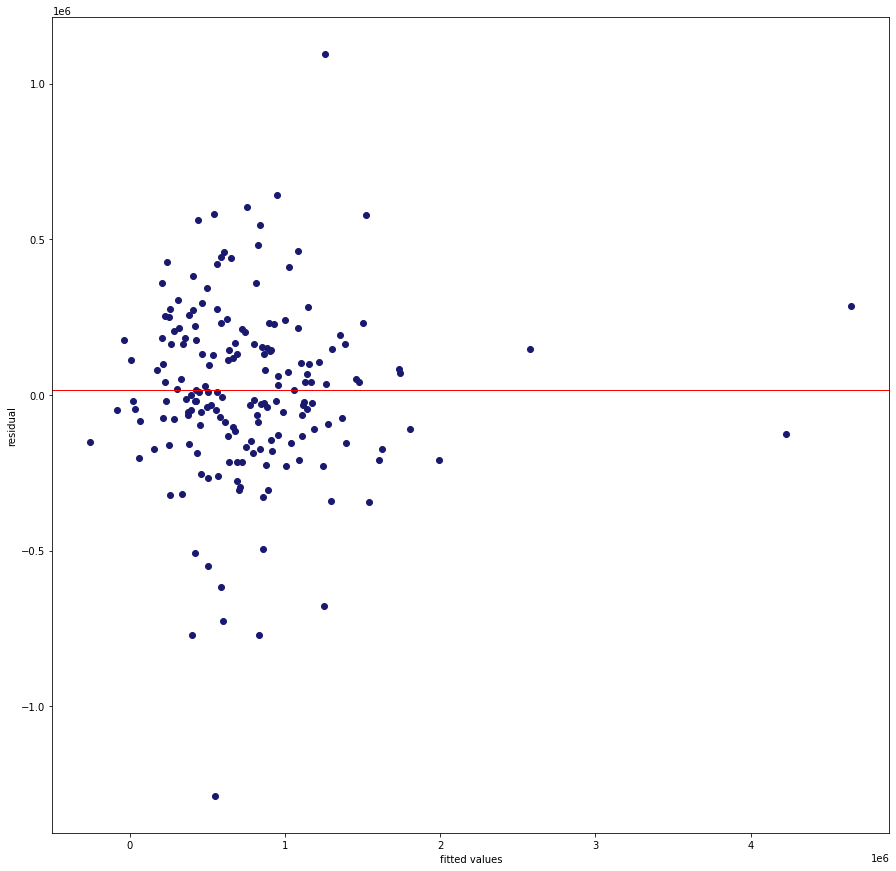

In [ ]:
import matplotlib.pyplot as plt
#residual plot for homoskedaticity

plt.figure(figsize = (15,15))
plt.scatter(y_pred, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

### QUANTILE REGRESSION



In [ ]:
from sklearn.linear_model import LinearRegression

X = hp_df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
             'grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

y = hp_df['price']

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(X, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X, y)))


Mean squared error: 93260961894.70
Variance score: 0.75


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:

# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', hp_df)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4801
Model:                       QuantReg   Bandwidth:                   9.466e+04
Method:                 Least Squares   Sparsity:                    4.470e+05
Date:                Thu, 27 May 2021   No. Observations:                  913
Time:                        07:33:56   Df Residuals:                      898
                                        Df Model:                           14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.358e+05   7397.526     99.471      0.000    7.21e+05     7.5e+05
X[0]       -3.021e+04   9588.642     -3.151      0.002    -4.9e+04   -1.14e+04
X[1]        1.707e+04    1.3e+04      1.314      0.189   -8425.531    4.26e+04
X[2]       -2.007e+04   1.22e+04     -1.643      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


### RIDGE REGRESSION

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
 #Setting up our X and y datasets
X = hp_df[['bedrooms','bathrooms','sqft_lot','floors','waterfront','view','condition',
             'grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

y = hp_df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,test_size=0.2)

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 0.355289 will be our indicator to determine if the regularized ridge regression model is superior or not.

93260961894.69803


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)






In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha  which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was.

105422224222.52405

In [ ]:
#the ridge value is not cross validated
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model =(mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

93296078743.987


In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
y_pred = ridge.predict(X_test)
C = r2_score(y_test,y_pred)
print(C)

0.76053013771502


In [ ]:
coef_dict_baseline = {}
for coef,feat in zip(regression.coef_,hp_df.columns):
  coef_dict_baseline[feat] = coef

coef_dict_baseline

{'bathrooms': -105639.95775192842,
 'bedrooms': -0.5874163378366575,
 'condition': 338.85406265752954,
 'floors': -6092.6088123904665,
 'grade': 303.9264560119916,
 'id': -59947.80192024907,
 'price': -12778.0203974269,
 'sqft_above': -3296.486141847326,
 'sqft_basement': 2009.2478778947802,
 'sqft_lot': 442289.5067550993,
 'view': 124600.09770471597,
 'waterfront': 18122.56038060935,
 'yr_built': 180.81298017022618,
 'yr_renovated': -1.7807213373744162}

In [ ]:
coef_dict_baseline = {}
for coef,feat in zip(ridge.coef_,hp_df.columns):
  coef_dict_baseline[feat] = coef

coef_dict_baseline

{'bathrooms': -101102.84987838581,
 'bedrooms': -0.5859046861519341,
 'condition': 328.77397990504306,
 'floors': -4467.487626621592,
 'grade': 298.04949306317644,
 'id': -57720.459222087535,
 'price': -7790.564401691556,
 'sqft_above': -3214.1314631713713,
 'sqft_basement': 1917.841786324248,
 'sqft_lot': 435658.2859196227,
 'view': 124627.15124676032,
 'waterfront': 17460.953451642654,
 'yr_built': 181.33012034147143,
 'yr_renovated': -1.7309584116810506}

Conclusion 

Our R^2  for the ridge is 0.76 which shows that our X variables explains the dependent variable by 76%

The MSE in Ridge was 93296078743.987 while that in linear was 93260961894.69803 
which was quite close to one another


## LASSO REGRESSION

In [ ]:
hp_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
hp_df.yr_renovated.unique()

array([45, 56, 64, 53, 46, 67, 48, 32, 59, 62, 57, 38, 10, 68, 65, 28, 37,
        4, 44, 42, 13, 31, 35, 49, 54, 52, 24, 43, 58, 40, 63, 61, 41, 27,
       60, 39, 55, 34, 25, 33, 51,  7, 23,  6, 69, 22, 66, 18,  8, 47, 17,
       50, 26,  9, 11, 36, 12,  2, 30,  5, 29, 14, 19, 15, 16, 21, 20,  1,
        3])

In [ ]:
hp_df.yr_renovated.unique()

array([45, 56, 64, 53, 46, 67, 48, 32, 59, 62, 57, 38, 10, 68, 65, 28, 37,
        4, 44, 42, 13, 31, 35, 49, 54, 52, 24, 43, 58, 40, 63, 61, 41, 27,
       60, 39, 55, 34, 25, 33, 51,  7, 23,  6, 69, 22, 66, 18,  8, 47, 17,
       50, 26,  9, 11, 36, 12,  2, 30,  5, 29, 14, 19, 15, 16, 21, 20,  1,
        3])

In [ ]:
hp_df.yr_built.value_counts()

50     31
42     24
24     20
30     20
0      19
       ..
89      1
91      1
90      1
66      1
103     1
Name: yr_built, Length: 95, dtype: int64

In [ ]:


# Creating features and target matrixes
#
X = hp_df[['bedrooms','bathrooms','sqft_lot','floors','waterfront','view','condition',
             'grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

y = hp_df['price']

# Scaling data 
#


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.7476948066871894
lasso MSE: 93260961927.1557
lasso coef: [-62365.38743619 -11371.93988125 -22335.00909822 -52255.24997763
  92652.53743025  -7413.08931619   9402.6955011  150151.13549286
 287536.37708952 164796.25311768 -74567.98261755  30317.3460824
 127300.74443483 -47847.72494066]


In [ ]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7358136551173147
linear score: 0.735853115191972
lasso MSE: 131637493363.71999
linear MSE: 131617831388.69194
lasso best estimator coef: [-50371.47732519 -10614.95559615 -27017.6782135  -47542.80291504
  65441.28236599  13308.68851659   8943.26385243 168599.59647631
 255351.42901568 139926.58951939 -70919.49519411  28265.41590681
 127502.82805109 -38472.89370758]
linear coef: [-50407.08320359 -10726.81553131 -27038.4141108  -47598.81618756
  65465.04372565  13312.61177031   8982.60009924 168607.19514672
 255493.86107463 139964.27450057 -70969.26894922  28332.53494844
 127513.23897561 -38492.41539766]


Conclusion 
Before we use grid search our 

r^2 was  0.7476948066871894
MSE was 93260961927.1557

Our r^2 in Lasso regression was 0.73 after using gridsearch to get the best parameters 

MSE FOR Lasso was 131637493363

### ELASTIC NET REGRESSION

In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)

105387933740.57623

In [ ]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

99879347774.23607


In [ ]:
coef_dict_baseline = {}
for coef,feat in zip(elastic.coef_,hp_df.columns):
  coef_dict_baseline[feat] = coef

coef_dict_baseline

{'bathrooms': -19599.9532942779,
 'bedrooms': -19382.48463725399,
 'condition': 183632.68284237638,
 'floors': 22045.48561184341,
 'grade': 124384.74110664235,
 'id': -27653.746457277815,
 'price': 36776.36517724339,
 'sqft_above': -46281.61695045213,
 'sqft_basement': 16072.505813925785,
 'sqft_lot': 71237.58366172784,
 'view': 139212.8849482191,
 'waterfront': 6381.699569906292,
 'yr_built': 123144.53171640939,
 'yr_renovated': -30175.771327914146}

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes our data was convenient since r^2 was quite high hence most of our X independent cariables explained the y dependent variable

### b). Do we need other data to answer our question?

### c). Did we have the right question?